In [22]:
import pandas as pd
import spacy

In [23]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [24]:
fake.shape

(23481, 4)

In [25]:
true.shape

(21417, 4)

In [26]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [28]:
fake['lable'] = 0
true['lable'] = 1

In [29]:
df = pd.merge(fake,true,how='outer')

In [30]:
df.sample(5)

,title,text,subject,date,lable
27063,Republican congressional candidate in Montana ...,(Reuters) - Montana Republican congressional c...,politicsNews,"May 25, 2017",1
8868,BUSTED: Guess What The Bundy Militia Was Doin...,Oregon Public Broadcasting just busted the Bun...,News,"January 9, 2016",0
15898,THE DOJ TOOK $7 MILLION TAXPAYER DOLLARS AND S...,The DOJ is reporting that they basically took ...,Government News,"Dec 5, 2017",0
35691,"Brazil's Temer to leave hospital, return to Br...",BRASILIA (Reuters) - Brazilian President Miche...,worldnews,"December 15, 2017",1
29484,White House says looks to reschedule meeting w...,PHILADELPHIA (Reuters) - The White House said ...,politicsNews,"January 26, 2017",1


In [31]:
df.shape

(44898, 5)

In [32]:
df = df.sample(10000,random_state=10,)

In [33]:
df.drop(df[['title','subject','date']],axis='columns',inplace=True)

In [34]:
df.shape

(10000, 2)

In [35]:
df.head()

,text,lable
3040,Democrats stood up for the American people but...,0
41612,BEIRUT (Reuters) - The Syrian military has cle...,1
6040,Republican House Speaker Paul Ryan has been ge...,0
30742,WASHINGTON (Reuters) - U.S. House Democratic L...,1
19492,The Michigan Court of Appeals rejected Green P...,0


In [36]:
df.lable.value_counts()

0    5212
1    4788
Name: lable, dtype: int64

<AxesSubplot:xlabel='lable', ylabel='count'>

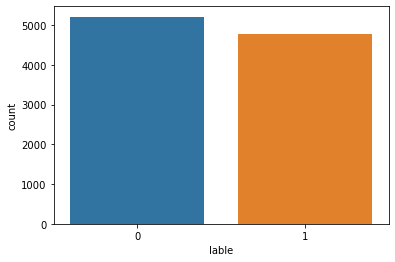

In [37]:
import seaborn as sns
sns.countplot(x='lable',data=df)

In [38]:
df.isnull().sum()

text     0
lable    0
dtype: int64

In [39]:
nlp = spacy.load('en_core_web_lg')

In [41]:
df['vector'] = df['text'].apply(lambda x: nlp(x).vector)

In [42]:
df.head()

,text,lable,vector
3040,Democrats stood up for the American people but...,0,"[-2.2413616, 0.8829072, -2.5269208, 0.51885337..."
41612,BEIRUT (Reuters) - The Syrian military has cle...,1,"[-2.9236248, 0.46827582, -1.7895272, 2.1510441..."
6040,Republican House Speaker Paul Ryan has been ge...,0,"[-1.3641711, 1.1180006, -1.9214587, -0.5378728..."
30742,WASHINGTON (Reuters) - U.S. House Democratic L...,1,"[-1.4524539, 1.2988873, -1.9457631, 0.32273692..."
19492,The Michigan Court of Appeals rejected Green P...,0,"[-2.5115018, 0.4474818, -1.7552104, 0.8835322,..."


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.vector.values,df.lable,test_size=0.2,random_state=10)

In [47]:
X_train.shape

(8000,)

In [49]:
X_test.shape

(2000,)

In [50]:
X_train

array([array([-2.0494754 ,  0.65270495, -1.6341592 ,  1.0867572 ,  3.9890804 ,
              -0.43352747,  0.9779843 ,  2.6092036 ,  0.736363  , -0.33292827,
               3.7473755 ,  0.3576881 , -3.0810127 ,  0.67096275, -2.2831628 ,
               2.4664037 ,  1.3354485 ,  0.74908596, -2.1002772 , -0.6966499 ,
               0.64430594, -0.2683191 , -1.9518905 ,  2.5522509 ,  0.9182555 ,
              -1.7931368 , -2.3148782 , -0.9398474 ,  0.04412145, -0.5510965 ,
              -0.45400837,  0.49907857,  0.6509859 , -1.2383628 , -1.2337947 ,
              -1.3534635 ,  0.71543026,  0.63323945,  0.7399027 , -0.55568814,
              -0.72250146, -0.6791401 ,  0.62782466,  1.3916597 , -1.4382266 ,
               0.16853535,  0.11720309, -0.52205884, -0.16099821,  0.35282165,
              -0.9907835 ,  0.9668749 , -0.7853409 , -3.635295  , -1.1893553 ,
               0.8217713 ,  0.6060453 ,  0.22927874, -0.15103324, -1.5242852 ,
               0.78711736, -0.95065665, -0.00841502,

In [51]:
#here our X_ytrain is NUmpy array in another numpy array so we have convert into 2d array 
#because our classifier is take a 2d array
#so we use stack function of numpy
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [53]:
X_train_2d

array([[-2.0494754 ,  0.65270495, -1.6341592 , ..., -0.87387615,
        -1.3969042 ,  1.5025567 ],
       [-2.4557934 ,  0.32393122, -1.1731005 , ..., -1.2763274 ,
        -2.0010169 ,  0.9979011 ],
       [-1.8883454 ,  0.36689234, -2.119003  , ..., -1.1519905 ,
        -1.1609759 ,  0.8115999 ],
       ...,
       [-1.8690879 ,  0.563252  , -1.8681753 , ..., -1.0942379 ,
        -2.5086968 ,  0.5735208 ],
       [-1.4903378 ,  1.0150518 , -1.9093577 , ..., -1.5914145 ,
        -1.8194873 ,  1.4785866 ],
       [-1.8187399 ,  0.8867698 , -1.8495626 , ..., -1.5343575 ,
        -2.1518245 ,  1.1137649 ]], dtype=float32)

In [55]:
#here we get error because MultinomialNB doese note take negative value and our array contains some negative value
#so we tackel this problem using feature scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_2d = sc.fit_transform(X_train_2d)
X_test_2d = sc.transform(X_test_2d) 

In [56]:
#now all values are positive ande between 0 nto 1
X_train_2d

array([[0.29837257, 0.52977526, 0.26857173, ..., 0.51127875, 0.4694417 ,
        0.782691  ],
       [0.2439056 , 0.49193597, 0.3034141 , ..., 0.45412898, 0.40130472,
        0.7342135 ],
       [0.31997207, 0.49688044, 0.23193191, ..., 0.4717853 , 0.49605173,
        0.7163173 ],
       ...,
       [0.32255352, 0.51947993, 0.25088704, ..., 0.47998643, 0.34404427,
        0.6934473 ],
       [0.373325  , 0.57147855, 0.24777488, ..., 0.40938526, 0.4217792 ,
        0.7803884 ],
       [0.32930267, 0.5567143 , 0.25229362, ..., 0.41748756, 0.38429537,
        0.74534345]], dtype=float32)

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
model = MultinomialNB()
model.fit(X_train_2d,y_train)
y_pred =model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1029
           1       0.84      0.90      0.87       971

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [59]:
#now trying Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_2d,y_train)
y_pred =model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1029
           1       0.77      0.93      0.84       971

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000



In [61]:
#now trying KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_2d,y_train)
y_pred =model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1029
           1       0.96      0.96      0.96       971

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



here the conclusion is KNN works better then other algorithm because here dimension is low in word embedding which is 300 dimension

# Exercise

In [123]:
df = pd.read_json("News_Category_Dataset.json",lines=True)
df.head()

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [124]:
df.shape

(124989, 6)

In [125]:
df = df.sample(2000,random_state=2022)

In [126]:
df.shape

(2000, 6)

In [144]:
def preprocess(text):
    clean_text = []
    doc = nlp(text);
    for token in doc:
        if not token.is_punct and not token.is_stop:
            clean_text.append(token.lemma_)
    return " ".join(clean_text)

In [128]:
df['preprocessed'] = df.short_description.apply(preprocess)

In [129]:
df.isnull().sum()

short_description    0
headline             0
date                 0
link                 0
authors              0
category             0
preprocessed         0
dtype: int64

In [130]:
df['vector'] = df.preprocessed.apply(lambda x: nlp(x).vector)

In [131]:
df.isnull().sum()

short_description    0
headline             0
date                 0
link                 0
authors              0
category             0
preprocessed         0
vector               0
dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

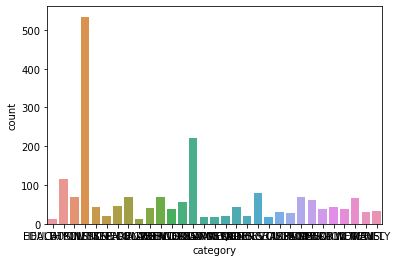

In [132]:
import seaborn as sns
sns.countplot(x="category",data=df)

In [133]:
df.category.value_counts()

POLITICS          534
ENTERTAINMENT     220
HEALTHY LIVING    116
QUEER VOICES       80
SPORTS             70
BUSINESS           69
PARENTS            68
BLACK VOICES       68
WOMEN              67
COMEDY             61
THE WORLDPOST      57
MEDIA              45
STYLE              44
CRIME              44
WEIRD NEWS         43
GREEN              40
RELIGION           39
WORLDPOST          38
WORLD NEWS         37
FIFTY              34
TASTE              31
TRAVEL             30
IMPACT             28
LATINO VOICES      21
SCIENCE            20
TECH               19
GOOD NEWS          18
ARTS               17
ARTS & CULTURE     17
EDUCATION          13
COLLEGE            12
Name: category, dtype: int64

In [134]:
df['num_category'] = df.category.map({
    'POLITICS':0,
    'ENTERTAINMENT':1,
    'WOMEN':2,
    'HEALTHY LIVING':3,
    'QUEER VOICES':4,
    'SPORTS':5,
    'BLACK VOICES':6,
    'BUSINESS':7,
    'COMEDY':8,
    'THE WORLDPOST':9,
    'GREEN':10,
    'WORLD NEWS':11,
    'PARENTS':12,
    'ARTS & CULTURE':13,
    'CRIME':14,
    'WEIRD NEWS':15,
    'MEDIA':16,
    'TASTE':17,
    'SCIENCE':18,
    'RELIGION':19,
    'EDUCATION':20,
    'TRAVEL':21,
    'LATINO VOICES':22,
    'WORLDPOST':23,
    'TECH':24,
    'COLLEGE':25,
    'IMPACT':26,
    'GOOD NEWS':27,
    'FIFTY':28,
    'ARTS':29,
    'STYLE':30
})

In [135]:
df.head()

,short_description,headline,date,link,authors,category,preprocessed,vector,num_category
106732,Are smaller class sizes the key to breathing n...,"By Trying to Reduce Class Sizes, We're Solving...",2014-11-14,https://www.huffingtonpost.com/entry/by-trying...,"Sam Chaltain, ContributorD.C.-based writer and...",EDUCATION,smaller class sizes key breathing new life tod...,"[0.38936618, 1.8236456, -1.2492259, 0.3860389,...",20
27763,"The series, marketed largely to a young adult ...",13 Reasons Why Parents Should Watch The Netfli...,2017-05-02,https://www.huffingtonpost.com/entry/13-reason...,"Sheela Raja, PhD, ContributorClinical Psycholo...",HEALTHY LIVING,series marketed largely young adult audience l...,"[-0.089584514, 1.3277062, -1.7515682, -0.04971...",3
113239,,10 Best-Paying Jobs for High School Graduates,2014-08-31,https://www.huffingtonpost.com/entry/10-bestpa...,,BUSINESS,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
106761,,"Jane Byrne, Chicago's First Female Mayor, Dead...",2014-11-14,https://www.huffingtonpost.com/entry/jane-byrn...,Joseph Erbentraut,POLITICS,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
114677,The sharing economy sector - where people with...,"Sharing Economy Leaders Will Be the New ""Demon...",2014-08-15,https://www.huffingtonpost.com/entry/sharing-e...,"Bill Shireman, ContributorPresident and CEO of...",BUSINESS,sharing economy sector people average holdings...,"[-0.86401635, -0.39874905, -2.5331602, -0.4586...",7


In [136]:
X_train,X_test,y_train,y_test = train_test_split(df.vector,df.num_category,test_size=0.2,random_state=10)

In [137]:
X_train

46118     [-0.27321, -0.84408, 5.4898, -1.3286, 2.1451, ...
33799     [1.5864499, 2.8117924, -2.4662776, 2.5489824, ...
51185     [-0.17283143, -2.1347616, -1.5885986, 0.883360...
124909    [0.29490772, 1.6437092, -3.0657792, 0.64427, 1...
10519     [0.24931593, 0.74209005, -1.3894953, 1.7163559...
                                ...                        
83207     [-0.29459, -0.5515233, -0.34390497, -0.5420599...
114519    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
53512     [-0.5378, 0.8461, -1.54955, 1.8047, 1.082, 1.0...
105799    [-0.985098, 0.1958759, -2.6621938, 1.1634419, ...
60248     [-1.33996, 0.6835019, -2.0858998, 2.291264, 2....
Name: vector, Length: 1600, dtype: object

In [138]:
y_train

46118      1
33799      3
51185     21
124909    12
10519     15
          ..
83207      1
114519    30
53512      1
105799     0
60248      0
Name: num_category, Length: 1600, dtype: int64

In [139]:
X_train = np.stack(X_train)

In [140]:
X_test = np.stack(X_test)

In [141]:
sc = MinMaxScaler()
scalled_X_train = sc.fit_transform(X_train)

In [142]:
scalled_X_test = sc.fit_transform(X_test)

In [143]:
clf = MultinomialNB()
clf.fit(scalled_X_train,y_train)
y_pred = clf.predict(scalled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.89      0.47       107
           1       0.19      0.46      0.27        41
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00        12
          17       0.00    

/Users/sachin/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachin/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sachin/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,